<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Using_CNN_on_IMDB_review_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [6]:
import tensorflow as tf
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
        tf.keras.layers.Conv1D(filters = filters, kernel_size = kernel_size, activation = 'relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(dense_dim, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 69s 571ms/step - loss: 0.6123 - accuracy: 0.6624 - val_loss: 0.4089 - val_accuracy: 0.8210
Epoch 2/10
98/98 [==============================] - 27s 269ms/step - loss: 0.2928 - accuracy: 0.8772 - val_loss: 0.2698 - val_accuracy: 0.8878
Epoch 3/10
98/98 [==============================] - 26s 255ms/step - loss: 0.1518 - accuracy: 0.9473 - val_loss: 0.2624 - val_accuracy: 0.8934
Epoch 4/10
98/98 [==============================] - 23s 232ms/step - loss: 0.0680 - accuracy: 0.9829 - val_loss: 0.2848 - val_accuracy: 0.8943
Epoch 5/10
98/98 [==============================] - 22s 221ms/step - loss: 0.0228 - accuracy: 0.9977 - val_loss: 0.3167 - val_accuracy: 0.8951
Epoch 6/10
98/98 [==============================] - 21s 208ms/step - loss: 0.0078 - accuracy: 0.9997 - val_loss: 0.3397 - val_accuracy: 0.8942
Epoch 7/10
98/98 [==============================] - 22s 216ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.3601 - val_accuracy: 0.8944

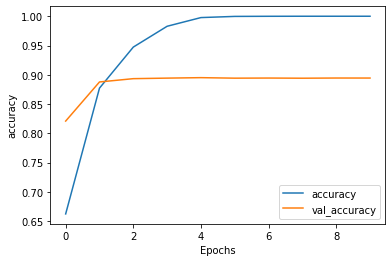

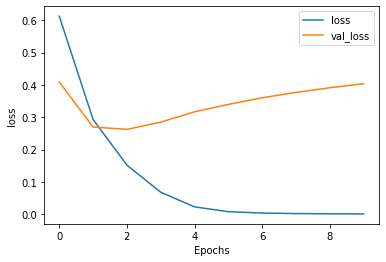

In [10]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
# Conclusion - Accuracy improved and overfitting reduced